# Сборный проект №1

### Описание проекта


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель проекта:** выявление закономерностей, определяющих успешность компьютерных игр, на основе исторических данных о продажах, оценках пользователей и экспертов, жанрах и платформах, для оптимизации планирования рекламных кампаний и выбора потенциально популярных продуктов в интернет-магазине "Стримчик" на 2017 год.

**Ожидаемые результаты:**

* оптимизация инвестиций: снижение рисков, связанных с вложением средств в непопулярные игры, за счет фокусировки на потенциально успешных продуктах.
* рост продаж: увеличение объемов продаж благодаря продвижению игр, которые с высокой вероятностью будут пользоваться спросом.
* повышение эффективности маркетинга: более точное таргетирование рекламных кампаний и оптимизация расходов на рекламу.

**Ход проекта:**

Шаг 1. Загрузка и первичный обзор данных:

* Открыть файл /datasets/games.csv.
* Изучить общую информацию о данных: количество строк и столбцов, типы данных, наличие пропусков.

Шаг 2. Предобработка данных:

* Приведение названий столбцов к нижнему регистру.
* Преобразование данных в нужные типы.
* Обработка пропусков.
* Обработка значения 'tbd' в столбце с оценкой пользователей.
* Расчет суммарных продаж во всех регионах.

Шаг 3. Исследовательский анализ данных:

* Анализ выпуска игр по годам.
* Анализ продаж по платформам.
* Определение актуального периода для анализа.
* Анализ продаж по платформам в актуальном периоде.
* Построение графика "ящик с усами" по глобальным продажам игр в разбивке по платформам.
* Анализ влияния отзывов на продажи.
* Анализ распределения игр по жанрам.

Шаг 4. Составление портрета пользователя каждого региона (NA, EU, JP):

* Определение топ-5 популярных платформ.
* Определение топ-5 популярных жанров.
* Анализ влияния рейтинга ESRB на продажи в каждом регионе.

Шаг 5. Проверка гипотез:

* Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.

Шаг 6. Общий вывод.

### Загрузка и первичный обзор данных

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from math import factorial, sqrt
import warnings

warnings.filterwarnings("ignore")
mpl.style.use(['bmh'])

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Колонки содержат информацию, которая соответствует их описанию.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


 Датафрейм содержит 16715 наблюдений  и 11 переменных
 
 В данных обнаружены следующие проблемы: несоответствие названий колонок принятому стандарту, наличие пропусков в данных и несоответствие типов данных.  Перед проведением анализа необходимо провести предобработку данных.

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


При использовании метода describe() для описания числовых переменных датафрейма, ожидалось увидеть 7 столбцов.  Однако, столбец с оценками пользователей имеет тип данных object, что указывает на наличие строк. Причины этого будут исследованы на этапе предобработки данных.

Обнаруженные наблюдения по данным о продажах игр:

1. Период выпуска игр:  Игры в датасете выпущены в период с 1980 по 2016 год, что охватывает значительный временной промежуток развития игровой индустрии.

2. Продажи по регионам:
    * Северная Америка (NA): Продажи варьируются от 0 до 41.36 млн копий, с медианой 0.08 млн.  Это говорит о наличии как очень успешных игр, так и большого количества игр с низкими продажами.
    * Европа (EU):  Продажи от 0 до 28.96 млн копий, медиана 0.02 млн.
    * Япония (JP): Продажи от 0 до 10.22 млн копий, медиана 0.  Здесь медианное значение указывает на то, что большая часть игр продается в относительно небольших количествах.
    * Другие страны: Продажи от 0 до 10.57 млн копий, медиана 0.01 млн.

3. Оценки критиков: Оценки критиков варьируются от 13 до 98 баллов, с медианой 71.  Это свидетельствует о широком диапазоне оценок,  но медиана указывает на то, что большинство игр получают достаточно высокие оценки.

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> первичный анализ данных о продажах игр позволил выявить следующую информацию:

* Датафрейм содержит 16715 наблюдений и 11 переменных.
* Колонки содержат информацию, которая соответствует их описанию.

Проблемы в данных:

* Несоответствие названий колонок принятому стандарту.
* Наличие пропусков в данных.
* Несоответствие типов данных.

Основные наблюдения:

1. Период выпуска игр: Данные охватывают период с 1980 по 2016 год, отражая значительный период развития игровой индустрии.

2. Продажи по регионам:
    * Северная Америка (NA):  Наблюдается большой разброс продаж (от 0 до 41.36 млн копий), с медианой 0.08 млн.  
    * Европа (EU):  Похожая ситуация с Северной Америкой, но медианное значение продаж ниже (0.02 млн).
    * Япония (JP):  Медианное значение продаж близко к нулю, что указывает на преобладание игр с низкими продажами в этом регионе.
    * Другие страны:  Разброс продаж от 0 до 10.57 млн копий, медиана 0.01 млн.

3. Оценки критиков:  Оценки варьируются от 13 до 98 баллов, с медианой 71, что говорит о достаточно высоких оценках большинства игр.


Для дальнейшего анализа необходимо провести предобработку данных,  включая:

* Стандартизацию названий колонок.
* Обработку пропусков.
* Приведение типов данных в соответствие с их описанием, в частности,  преобразование столбца с оценками пользователей в числовой формат.
</div>

### Предобработка данных

Сначала приведем названия столбцов к нижнему регистру, затем проведем детальный анализ каждого столбца для обработки пропусков, корректировки типов данных и выявления аномальных значений.

In [6]:
df.columns = df.columns.str.lower()

Проверим отсутствие явных дубликатов в данных.

In [7]:
df.duplicated().sum()

0

Создадим функцию get_column_info, которая будет подсчитывать пропуски и выводить описательную статистику для столбца и его тип данных.

In [8]:
def get_column_info(column):
    print("Количество пропусков в столбце:", df[column].isna().sum())
    print('-'*50)
    print(df[column].describe())
    print('-'*50)
    print("Тип данных: ", df[column].dtypes)

**name**

In [9]:
get_column_info('name')

Количество пропусков в столбце: 2
--------------------------------------------------
count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object
--------------------------------------------------
Тип данных:  object


Будем искать дубликаты, основываясь на данных в столбцах name, platform и year_of_release,  и удалим их.

In [10]:
display(df.loc[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [11]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Учитывая малое количество пропусков (2), их удаление не должно существенно повлиять на результаты анализа и является наиболее простым способом обработки.

В названиях некоторых игр присутствует указание платформы, дублирующее информацию из соответствующего столбца.  Предлагается удалить названия платформ из названий игр.

In [13]:
df = df.dropna(subset=['name'])
print("Количество пропусков в столбце:", df['name'].isna().sum())

Количество пропусков в столбце: 0


In [14]:
unique_platform = df['platform'].unique()

for i in unique_platform:
    df['name'] = df['name'].replace(i, '', regex=True).apply(str.strip)

df['name'].unique()

array(['Sports', 'Super Mario Bros.', 'Mario Kart', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [15]:
get_column_info('name')

Количество пропусков в столбце: 0
--------------------------------------------------
count                           16712
unique                          11526
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object
--------------------------------------------------
Тип данных:  object


 В столбце name были обнаружены и удалены 2 пропущенных значения.  Также была проведена обработка неявных дубликатов,  в результате чего количество уникальных значений уменьшилось с 11559 до 11526.

 Причиной появления пропусков в данных могут быть технические неполадки, например, сбои во время выгрузки данных.

**platform**

In [16]:
get_column_info('platform')

Количество пропусков в столбце: 0
--------------------------------------------------
count     16712
unique       31
top         PS2
freq       2161
Name: platform, dtype: object
--------------------------------------------------
Тип данных:  object


Пропуски в данных отсутствуют.  Переходим к проверке на наличие неявных дубликатов.

In [17]:
unique_platform

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Wii - игровая приставка 7-го поколения, 5-я домашняя консоль фирмы Nintendo и наследница Nintendo GameCube.

NES (Nintendo Entertainment System) -  восьмибитная игровая система, популярная в середине 1980-х и начале 1990-х годов.

GB (Game Boy) - 8-битная портативная игровая система, разработанная и произведённая компанией Nintendo. 

DS (Нинтэндо: DS, сокращённо NDS либо DS) - следующее поколение карманных игровых консолей компании Nintendo после Game Boy Advance SP. 

XOne, X360, XB (Xbox One, Xbox 360, Xbox) - игровая приставка компании Microsoft.

PS4, PS3, PS2, PS (PlayStation 4, 3, 2, 1) - игровая приставка,выпущенная компанией Sony.

SNES (Super Nintendo Entertainment System) - 16-битная игровая приставка, выпущенная компанией Nintendo.

GBA (Game Boy Advance) - 32-разрядная портативная игровая система компании Nintendo.

3DS (Nintendo 3DS) - портативная игровая система производства Nintendo, способная создавать трёхмерный эффект изображения за счёт автостереоскопии, то есть без использования специальных очков.

N64 (Nintendo 64) - также Ultra 64 — 64-разрядная игровая приставка.

PC - ПК

2600 (Atari 2600) - игровая приставка, разработанная и выпускавшаяся американской компанией Atari. 

PSP (PlayStation Portable) -  портативная игровая консоль производства Sony Computer Entertainment. 

WiiU - название игровой консоли Nintendo, которая является преемником Wii.

GC (Nintendo GameCube) - четвёртая домашняя игровая консоль от Nintendo, относится к шестому поколению игровых систем.

GEN (Sega Genesis) - игровая приставка четвёртого поколения, разработанная и выпускавшаяся компанией Sega.

DC (Dreamcast) - омашняя игровая приставка, выпущенная компанией Sega 27 ноября 1998 года.

PSV (PlayStation Vita) - портативная консоль от Sony Computer Entertainment.

SAT (Sega Saturn) - домашняя игровая приставка, разработанная компанией Sega и выпущенная 22 ноября 1994 года.

SCD (Sega SD) - дополнение к игровой приставке Sega Mega Drive от компании Sega.

WS (WonderSwan) - портативная игровая консоль компании Bandai, выпущенная в 1999 году в Японии.

TG16 (TurboGrafx-16) - домашняя игровая приставка, выпущенная совместно компаниями Hudson Soft и NEC.

3DO (3DO Interactive Multiplayer) - игровая приставка, выпускавшаяся в 1993—1996 годах компаниями Panasonic, Sanyo, Creative и Goldstar. 

GG (Sega Game Gear) - 8-битная портативная игровая система четвёртого поколения, выпущенная компанией Sega.

PCFX - 32-разрядная игровая консоль, разработанная компанией NEC. 


Основываясь на данных из Википедии,  можно сделать вывод об отсутствии неявных дубликатов.  Несмотря на то, что информация о приставке NG не найдена (возможно, это Nintendo GameCube),  изменение данных может привести к неточностям,  поэтому думаю лучше оставить их в исходном виде.

**year_of_release**

In [18]:
get_column_info('year_of_release')

Количество пропусков в столбце: 269
--------------------------------------------------
count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64
--------------------------------------------------
Тип данных:  float64


Для заполнения пропусков в годе выпуска будем использовать данные по играм с идентичными названиями.  Учитывая, что игры могут выходить на разных платформах в разные годы,  этот подход может внести небольшую погрешность,  однако,  ввиду малого количества пропусков,  влияние на общую картину будет незначительным.

In [19]:
print('До:', df['year_of_release'].isna().sum())

for i in df['name'].unique():
    df.loc[(df['name'] == i) & (df['year_of_release'].isna()), 'year_of_release'] =\
    df.loc[df['name'] == i, 'year_of_release'].median()

print('После:', df['year_of_release'].isna().sum())

До: 269
После: 146


В результате наших действий количество пропусков сократилось с 269 до 146.  Оставшиеся пропуски будут удалены,  а тип данных будет преобразован в целочисленный (int).

In [20]:
df = df.dropna(subset=['year_of_release'])

In [21]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [22]:
get_column_info('year_of_release')

Количество пропусков в столбце: 0
--------------------------------------------------
count    16566.000000
mean      2006.489919
std          5.862700
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64
--------------------------------------------------
Тип данных:  int64


Пропуски в данных о годе выпуска (year_of_release) могут объясняться как техническими причинами, так и тем, что игра была анонсирована, но не вышла в свет.

**genre**

In [23]:
get_column_info('genre')

Количество пропусков в столбце: 0
--------------------------------------------------
count      16566
unique        12
top       Action
freq        3342
Name: genre, dtype: object
--------------------------------------------------
Тип данных:  object


Данные не содержат пропусков. Следующим шагом будет поиск неявных дубликатов.

In [24]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

С данными проблем нет, единственное, что нужно сделать - это перевести все символы в нижний регистр.

In [25]:
df['genre'] = df['genre'].apply(str.lower)

In [26]:
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

**na_sales, eu_sales, jp_sales, other_sales**

 В первую очередь,  необходимо выяснить,  почему рынок видеоигр сегментирован на такие регионы, как Северная Америка, Европа, Япония и другие.

Деление игровой индустрии на регионы NA (Северная Америка), EU (Европа) и JP (Япония) обусловлено несколькими ключевыми факторами:
1. Культурные различия:

* Предпочтения в жанрах:  игроки в разных регионах предпочитают разные жанры игр. Например, в Японии популярны RPG и файтинги, в то время как в Северной Америке и Европе больше востребованы шутеры и спортивные симуляторы.
* Локализация:  игры часто адаптируются под культурные особенности каждого региона, включая перевод текста, озвучку, а иногда и изменение сюжета или игрового процесса.

2. Технические стандарты:

* Разные форматы носителей:  в прошлом,  региональные различия в форматах игровых картриджей и дисков препятствовали запуску игр из одного региона на консолях, предназначенных для другого.
* Системы рейтингов:  в разных регионах действуют разные системы возрастных рейтингов для видеоигр.

3. Экономические факторы:

* Ценообразование:  цены на игры могут варьироваться в зависимости от региона,  учитывая покупательскую способность и местные налоги.
* Дистрибуция:  издатели игр могут заключать эксклюзивные соглашения с дистрибьюторами в разных регионах,  что влияет на доступность определенных игр.

4. Исторические причины:

* Развитие игровой индустрии:  игровая индустрия развивалась независимо в разных регионах,  что привело к формированию уникальных рынков и традиций.


In [27]:
get_column_info('na_sales')

Количество пропусков в столбце: 0
--------------------------------------------------
count    16566.000000
mean         0.263991
std          0.816496
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64
--------------------------------------------------
Тип данных:  float64


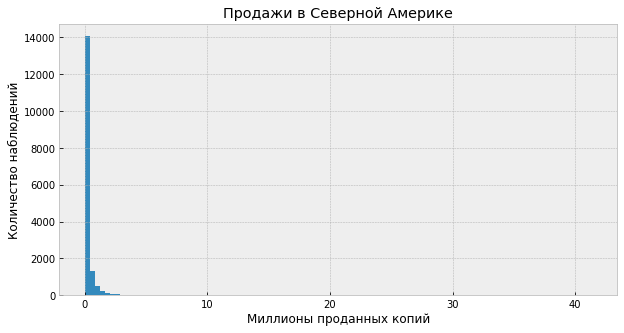

In [28]:
df['na_sales'].plot(kind='hist', figsize=(10,5), bins=100)
plt.title('Продажи в Северной Америке')
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Количество наблюдений')
plt.show()

In [29]:
df[df['na_sales'] > 10]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros.,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Данные достоверны и отражают реальную ситуацию. [Стр. на Wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B2%D0%B0%D0%B5%D0%BC%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80)

In [30]:
get_column_info('eu_sales')

Количество пропусков в столбце: 0
--------------------------------------------------
count    16566.000000
mean         0.145822
std          0.505378
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64
--------------------------------------------------
Тип данных:  float64


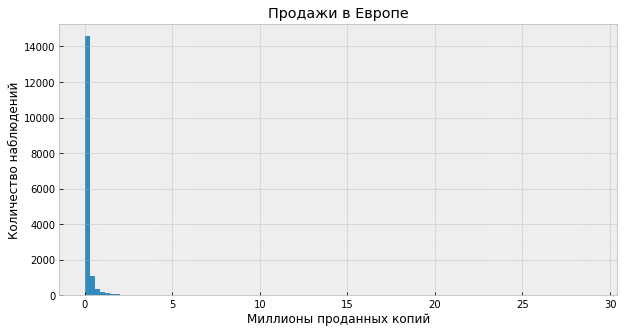

In [31]:
df['eu_sales'].plot(kind='hist', figsize=(10,5), bins=100)
plt.title('Продажи в Европе')
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Количество наблюдений')
plt.show()

In [32]:
df[df['eu_sales'] > 10]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
10,Nintendogs,DS,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Никаких проблем не обнаружено.

In [33]:
get_column_info('jp_sales')

Количество пропусков в столбце: 0
--------------------------------------------------
count    16566.000000
mean         0.078025
std          0.310077
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64
--------------------------------------------------
Тип данных:  float64


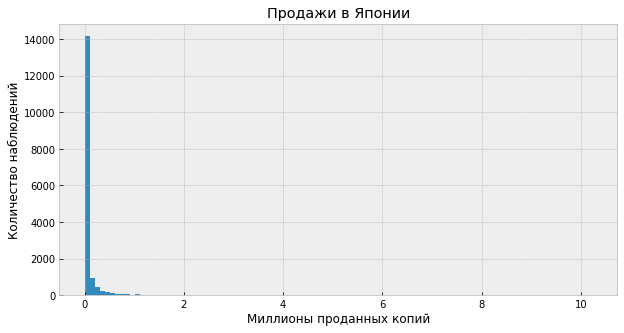

In [34]:
df['jp_sales'].plot(kind='hist', figsize=(10,5), bins=100)
plt.title('Продажи в Японии')
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Количество наблюдений')
plt.show()

In [35]:
df[df['eu_sales'] > 8]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
10,Nintendogs,DS,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
13,Fit,Wii,2007,sports,8.92,8.03,3.60,2.15,80.0,7.7,E
15,Fit Plus,Wii,2009,sports,9.01,8.49,2.53,1.77,80.0,7.4,E
16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M


Всё верно.

In [36]:
get_column_info('other_sales')

Количество пропусков в столбце: 0
--------------------------------------------------
count    16566.000000
mean         0.047570
std          0.187482
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64
--------------------------------------------------
Тип данных:  float64


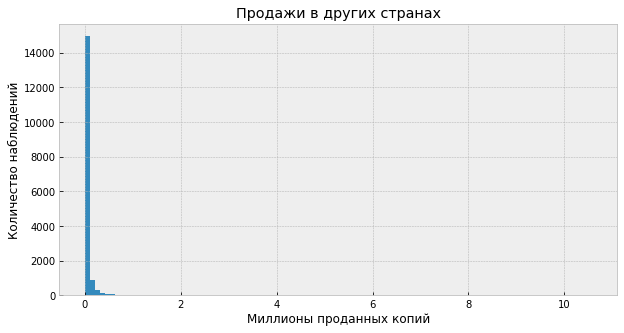

In [37]:
df['other_sales'].plot(kind='hist', figsize=(10,5), bins=100)
plt.title('Продажи в других странах')
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Количество наблюдений')
plt.show()

In [38]:
df[df['other_sales'] > 6]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
17,Grand Theft Auto: San Andreas,PS2,2004,action,9.43,0.40,0.41,10.57,95.0,9,M
48,Gran Turismo 4,PS2,2004,racing,3.01,0.01,1.10,7.53,89.0,8.5,E


Всё в порядке.

Данные корректны.  Наиболее продаваемой игрой,  независимо от региона,  является Wii Sports,  выпущенная в 2006 году.

**critic_score, user_score**

In [39]:
get_column_info('critic_score')

Количество пропусков в столбце: 8492
--------------------------------------------------
count    8074.000000
mean       68.990216
std        13.923373
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64
--------------------------------------------------
Тип данных:  float64


In [40]:
get_column_info('user_score')

Количество пропусков в столбце: 6633
--------------------------------------------------
count     9933
unique      96
top        tbd
freq      2394
Name: user_score, dtype: object
--------------------------------------------------
Тип данных:  object


🤔 Хм,  возможно, дело в том, что не все игры одинаково популярны.  Если игра не имела коммерческого успеха,  вполне вероятно, что критики и игроки не уделили ей должного внимания,  и, как следствие, оценок просто меньше. 

🤔 С другой стороны,  некоторые данные об оценках могут быть конфиденциальными и не доступны для публичного использования.  Это тоже может объяснить наличие пропусков.

🤔 А еще,  всегда есть вероятность ошибок при сборе или обработке данных.  Возможно,  информация об оценках была утеряна  из-за технических проблем.

 Оставим пропуски как есть,  а сейчас сосредоточимся на типе данных столбца user_score.

In [41]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Аббревиатура TBD расшифровывается как To Be Determined (или To Be Decided). В переводе на русский это означает "будет определено (позже)" или "будет решено (позже)".

Предлагаю заменить значения "TBD" на пропущенные значения, после чего преобразовать тип данных столбца в float.

In [42]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float')

In [43]:
get_column_info('user_score')

Количество пропусков в столбце: 9027
--------------------------------------------------
count    7539.000000
mean        7.125242
std         1.498237
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64
--------------------------------------------------
Тип данных:  float64


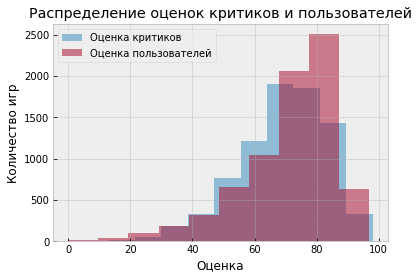

In [44]:
fig, ax = plt.subplots()
df.critic_score.hist(ax=ax, label='Оценка критиков',alpha=0.5)
(df.user_score*10).hist(ax=ax, label='Оценка пользователей', alpha=0.5)
ax.legend(loc='upper left')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество игр')
ax.set_title('Распределение оценок критиков и пользователей')
plt.alpha=0.5
plt.show()

Наблюдается  общая  согласованность  между  оценками  критиков  и  пользователей.  Однако,  оценки  пользователей  имеют  более  широкий  диапазон.  Это  объясняется  тем,  что  профессиональные  критики  стремятся  к  большей  объективности  в  своих  суждениях.

**rating**

[Entertainment Software Rating Board (ESRB)](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»).

  «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.

  «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults").

  «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.

  «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

  «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

  «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.

  «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

  «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант.

In [45]:
get_column_info('rating')

Количество пропусков в столбце: 6699
--------------------------------------------------
count     9867
unique       8
top          E
freq      3957
Name: rating, dtype: object
--------------------------------------------------
Тип данных:  object


In [46]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим "K-A" на "E", так как это обозначение одного и того же рейтинга ("Kids to Adults").

In [47]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

Пропущенные значения в данных будут заменены на "no_info", поскольку их наличие может свидетельствовать о том, что организация ESRB по тем или иным причинам не присвоила рейтинг данной игре.

In [48]:
df['rating'] = df['rating'].fillna('no_info')

In [49]:
df['rating'].unique()

array(['E', 'no_info', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

**Суммарные продажи во всех регионах**

Создадим новый столбец с именем total_sales, который будет содержать информацию о суммарном количестве проданных игр по всем регионам.

In [50]:
df['total_sales'] = df['na_sales'] + df['eu_sales']+ df['jp_sales'] + df['other_sales']
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4620,Harry Potter and the Goblet of Fire,GC,2005,action,0.32,0.08,0.00,0.01,69.0,6.3,E10+,0.41
3689,Are You Smarter than a 5th Grader? Make the Grade,Wii,2008,misc,0.50,0.00,0.00,0.04,NaN,NaN,E,0.54
9254,7th Dragon,DS,2009,role-playing,0.00,0.00,0.14,0.00,NaN,NaN,no_info,0.14
12869,Speed Kings,XB,2003,racing,0.04,0.01,0.00,0.00,60.0,8.8,E,0.05
10217,Winter Stars,Wii,2011,sports,0.05,0.05,0.00,0.01,NaN,NaN,E,0.11
9382,MLB 11: The Show,PS2,2011,sports,0.06,0.05,0.00,0.02,NaN,6.2,E,0.13
11441,Tornado Outbreak,X360,2009,action,0.07,0.00,0.00,0.01,62.0,8.0,E10+,0.08
12437,Tokimeki no Houkago,PS,1998,misc,0.00,0.00,0.06,0.00,NaN,NaN,no_info,0.06
11421,Kaijuu Busters Powered,DS,2011,action,0.00,0.00,0.08,0.00,NaN,NaN,no_info,0.08
7065,Mortal Kombat: Armageddon,Wii,2007,fighting,0.19,0.02,0.00,0.02,71.0,8.4,M,0.23


<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> В ходе предобработки данных были выполнены следующие действия:

* Очистка данных: Удалены пропущенные значения и неявные дубликаты в названиях игр (name) и годе выпуска (year_of_release).
* Стандартизация: Названия столбцов приведены к нижнему регистру, а данные в столбце genre приведены к единообразному виду.
* Обработка пропусков: Пропуски в year_of_release заполнены на основе данных об играх с идентичными названиями, оставшиеся пропуски удалены.
* Коррекция типов данных: Тип данных в столбце year_of_release преобразован в целочисленный (int).
* Обработка значений TBD: Значения "TBD" в столбце рейтинга заменены на пропущенные значения, тип данных столбца преобразован в float. 
* Создание столбца total_sales: Для удобства анализа будет создан новый столбец total_sales, содержащий информацию о суммарном количестве проданных игр по всем регионам.

Основные выводы:

* Качество данных:  Проделанная работа значительно повысила качество данных, подготовив их для дальнейшего анализа.
* Влияние регионов:  Различия в культуре, технических стандартах, экономических условиях и истории развития игровой индустрии объясняют деление на регионы (NA, EU, JP) и оказывают влияние на предпочтения игроков и продажи игр.
* Наиболее продаваемая игра:  Wii Sports (2006) является наиболее продаваемой игрой, независимо от региона.
* Пропуски в оценках:  Пропуски в данных об оценках могут быть связаны с низкой популярностью игры, конфиденциальностью данных или техническими ошибками.
</div>

### Исследовательский анализ данных

**Анализ выпуска игр по годам**

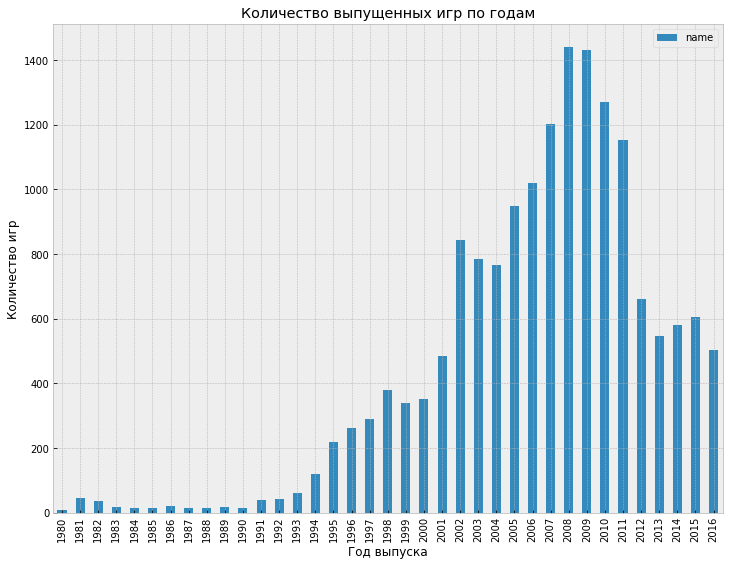

In [51]:
game_year = df.pivot_table(index='year_of_release', 
                           values='name', 
                           aggfunc='count').plot(kind='bar', figsize=(12, 9))

plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Датафрейм содержит информацию об играх, выпущенных в период с 1980 по 2016 год.  Начиная с 1990 года наблюдается значительный рост количества выпускаемых игр,  достигающий пика в 2008 и 2009 годах (более 1400 игр ежегодно).  После этого происходит спад до уровня около 600 игр в год.  В связи с  небольшим количеством игр, выпущенных до 1990 года,  их анализ не представляет практического интереса.

**Анализ продаж по платформам, определение актуального периода для анализа и анализ продаж по платформам в актуальном периоде**

Рассмотрим топ-10 платформ.

In [52]:
platform_sales = df.pivot_table(index='platform', 
                                values='total_sales', 
                                aggfunc='sum').sort_values(by='total_sales', ascending=False)

top_10_platform_sales = platform_sales[:10]
top_10_platform_sales

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.18
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Сформируем датафрейм, содержащий информацию об играх, выпущенных на 10 самых популярных платформах.

In [53]:
top_platforms_games = df[df['platform'].isin(top_10_platform_sales.index)]
top_platforms_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,platform,0.01,0.00,0.00,0.00,NaN,NaN,no_info,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,racing,0.00,0.00,0.00,0.00,NaN,NaN,no_info,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,no_info,0.01
16711,LMA Manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,no_info,0.01


Используя данные из ранее подготовленного датафрейма, построим графики, отображающие период активности каждой платформы.

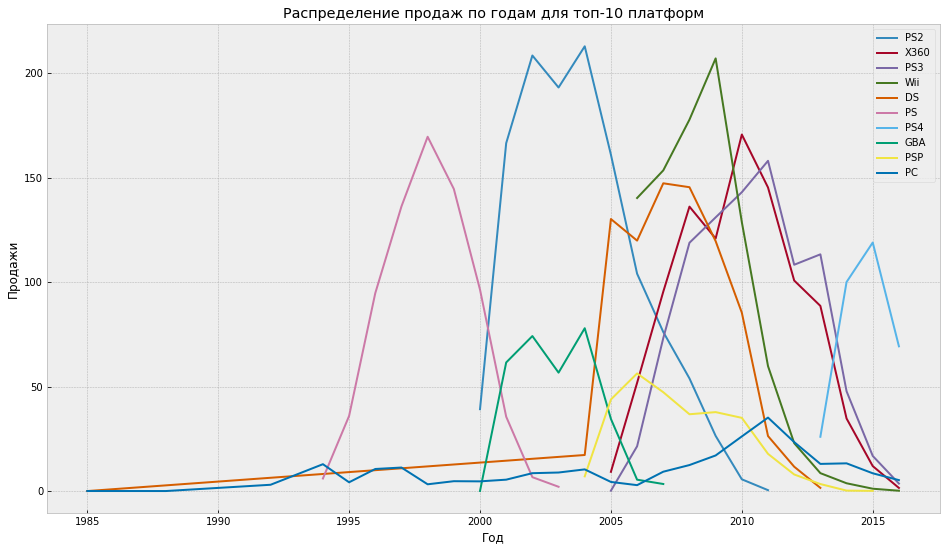

In [54]:
# Строим распределение продаж по годам для каждой платформы
fig, ax = plt.subplots(figsize=(16, 9))

for platform in top_10_platform_sales.index:
    platform_data = top_platforms_games[top_platforms_games['platform'] == platform]
    platform_data.groupby('year_of_release')['total_sales'].sum().plot(ax=ax, label=platform)

ax.legend()
ax.set_xlabel('Год')
ax.set_ylabel('Продажи')
ax.set_title('Распределение продаж по годам для топ-10 платформ')

plt.show()

График распределения продаж по годам для топ-10 платформ демонстрирует, что каждая платформа имеет свой жизненный цикл.  Например,  PlayStation  была  актуальна  с  1994  по  2003  год,  после  чего  ее  сменила  PS2,  а  затем  PS3  и  PS4.  Эта  тенденция  смены  поколений  подтверждает  вывод  о  том,  что  жизненный  цикл  платформы  составляет  примерно  10  лет.  Следовательно,  для  прогнозирования  продаж  на  2017  год  логично  использовать  данные  о  платформах,  выпущенных  за  последние  5  лет,  так  как  они  с  большей  вероятностью  будут  востребованы  и  активны  в  этот  период.

In [55]:
live_platforms = df.query('year_of_release >= 2012').pivot_table(index='year_of_release', 
                                                                 columns='platform',
                                                                 values='total_sales',
                                                                 aggfunc='sum').fillna(0)
live_platforms

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.76,11.67,23.45,108.27,0.00,7.95,16.19,22.94,17.56,100.72,0.00
2013,56.57,1.54,13.01,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


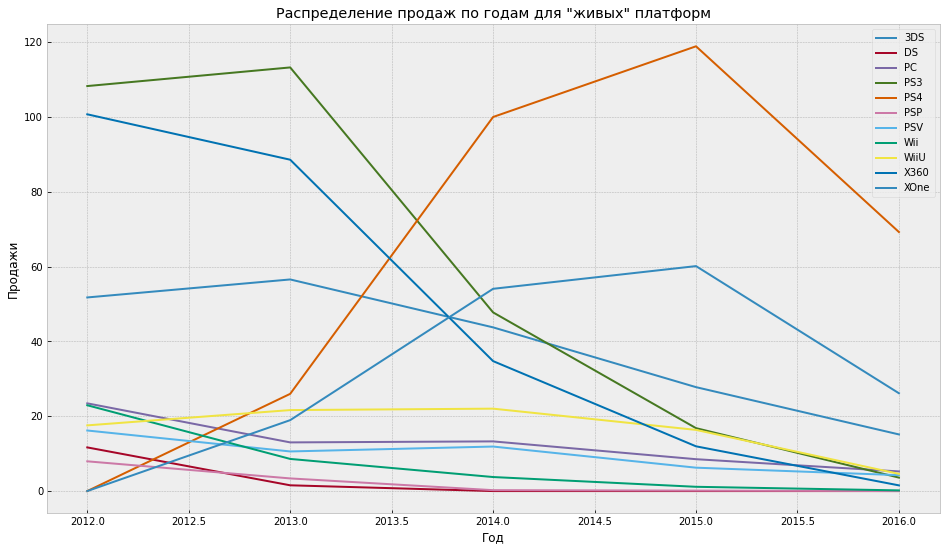

In [56]:
fig, ax = plt.subplots(figsize=(16, 9))
live_platforms.plot(ax=ax, label=platform)

ax.legend()
ax.set_xlabel('Год')
ax.set_ylabel('Продажи')
ax.set_title('Распределение продаж по годам для "живых" платформ')

plt.show()

Sony PlayStation 4  и  Microsoft Xbox One  -  наиболее  перспективные  платформы  в  2017  году.  Несмотря  на  общий  спад  продаж  в  2016  году  (возможно,  из-за  неполноты  данных),  именно  эти  платформы  обещают  наибольшую  прибыль.  3DS, PC, Wii U , Xbox 360, XOne  и  PS3  еще  могут  быть  актуальны,  но  остальные  платформы  уже  устарели.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Да, прежде всего стоит обратить внимание на PS4 и XOne.

**Построение графика "ящик с усами" по глобальным продажам игр в разбивке по платформам**

Для  анализа  будут  использоваться  данные  по  играм,  выпущенным  с  2012  года  на  следующих  актуальных  платформах:  3DS,  PC,  Wii U,  Xbox 360,  Xbox One,  PlayStation 3  и  PlayStation 4.  

In [57]:
top_live_platforms = df.query("year_of_release >= 2012 & platform in ['3DS', 'PC', 'PS3', 'PS4', 'WiiU', 'X360', 'XOne']")
top_live_platforms.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4017,F1 2012,X360,2012,racing,0.10,0.34,0.00,0.05,84.0,6.9,E,0.49
6089,Hot Shots Golf: World Invitational,PS3,2012,sports,0.00,0.00,0.28,0.00,NaN,7.9,E,0.28
15274,Motto! SoniComi,PS3,2014,simulation,0.00,0.00,0.02,0.00,NaN,NaN,no_info,0.02
16248,Azure Striker Gunvolt: Striker Pack,3DS,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
7066,Madden NFL 13,WiiU,2012,sports,0.21,0.00,0.00,0.02,75.0,6.7,E,0.23


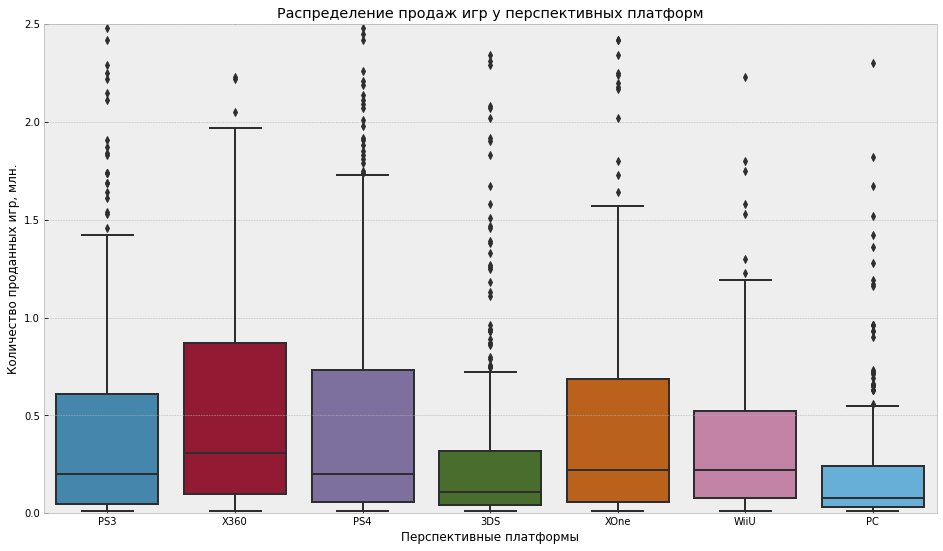

In [58]:
fig, ax = plt.subplots(figsize=(16, 9))

ax = sns.boxplot(x='platform', y='total_sales', data=top_live_platforms)
ax.set_ylim(0, 2.5)
ax.set_ylabel('Количество проданных игр, млн.')
ax.set_xlabel('Перспективные платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()


In [59]:
top_live_platforms.query('total_sales >= 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_info,14.63
33,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,no_info,14.60
34,Call of Duty: Black Ops II,PS3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,no_info,11.68
60,Call of Duty: Ghosts,X360,2013,shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


На всех платформах было продано большое количество различных игр. Медианное значение продаж игр составляет около 250 000 копий.  Однако  некоторые  игры,  например  Grand Theft Auto V, Call of Duty: Black Ops 3  и  Pokemon X/Pokemon Y,  смогли  добиться  значительно  более  высоких  показателей  продаж.

Хотелось  бы  отдельно  отметить  так  называемое  восьмое  поколение  домашних  игровых  консолей,  таких  как  PlayStation 4,  Xbox One  и  Wii U.  Несмотря  на  то,  что  Nintendo 3DS  также  является  системой  восьмого  поколения,  ее  портативность  пользуется меньшей  популярностью  по  сравнению  с  домашними  консолями.

**Анализ влияния отзывов на продажи**

 Проанализируем, как оценки критиков и пользователей влияют на продажи игр на перспективных игровых платформах.

Изучим средние оценки по платформам.

In [60]:
top_live_platforms.groupby('platform')[['critic_score', 'user_score']].agg('mean').round(1)


,critic_score,user_score
platform,,
3DS,69.8,7.0
PC,75.8,6.4
PS3,71.5,6.5
PS4,72.1,6.7
WiiU,70.7,6.9
X360,70.9,6.2
XOne,73.3,6.5


В среднем, игры на всех платформах получают хорошие оценки. Однако, если рассматривать оценки критиков и игроков отдельно, то можно заметить различия. Критики наиболее высоко оценили игры на PC, а наименее высоко - на 3DS. В то же время, игроки поставили самые высокие баллы играм на 3DS, а самые низкие - на Xbox 360.

Визуализируем матрицу корреляции и рассчитаем численные значения корреляции для каждой игровой платформы.

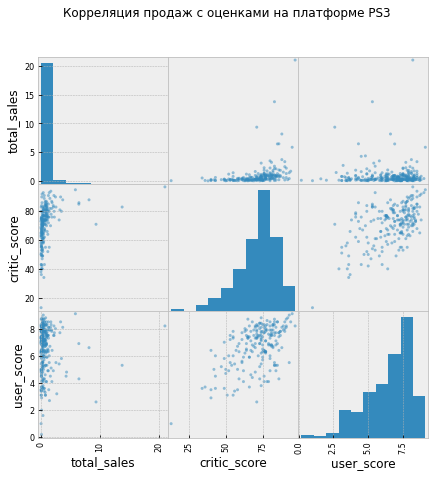

              total_sales  critic_score  user_score
total_sales      1.000000      0.334018   -0.006110
critic_score     0.334018      1.000000    0.544587
user_score      -0.006110      0.544587    1.000000
____________________________________________________________


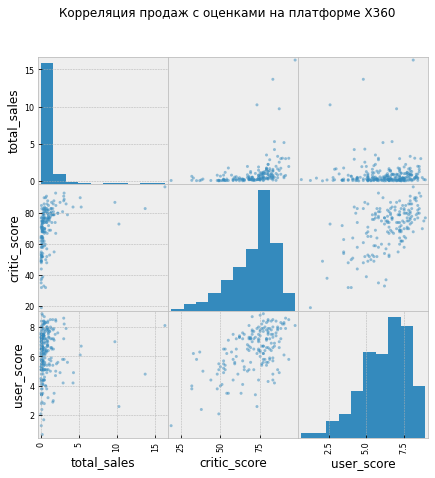

              total_sales  critic_score  user_score
total_sales      1.000000      0.360266    0.006315
critic_score     0.360266      1.000000    0.557952
user_score       0.006315      0.557952    1.000000
____________________________________________________________


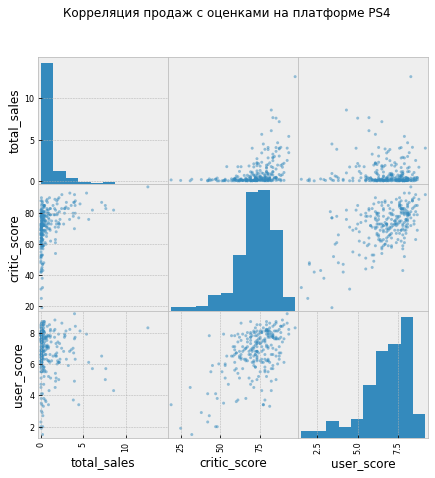

              total_sales  critic_score  user_score
total_sales      1.000000      0.406568   -0.031957
critic_score     0.406568      1.000000    0.557654
user_score      -0.031957      0.557654    1.000000
____________________________________________________________


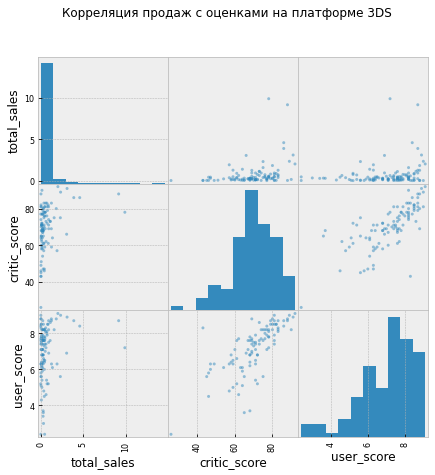

              total_sales  critic_score  user_score
total_sales      1.000000      0.320458    0.198150
critic_score     0.320458      1.000000    0.721517
user_score       0.198150      0.721517    1.000000
____________________________________________________________


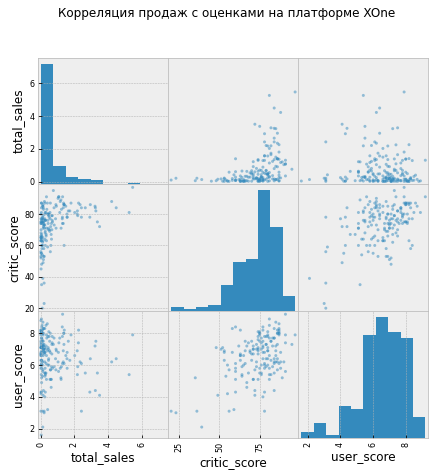

              total_sales  critic_score  user_score
total_sales      1.000000      0.416998   -0.068925
critic_score     0.416998      1.000000    0.472462
user_score      -0.068925      0.472462    1.000000
____________________________________________________________


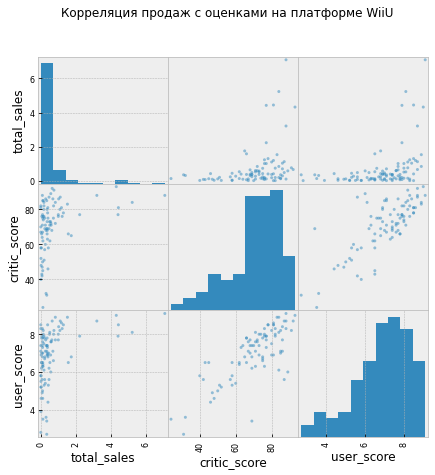

              total_sales  critic_score  user_score
total_sales      1.000000       0.34838    0.400219
critic_score     0.348380       1.00000    0.770080
user_score       0.400219       0.77008    1.000000
____________________________________________________________


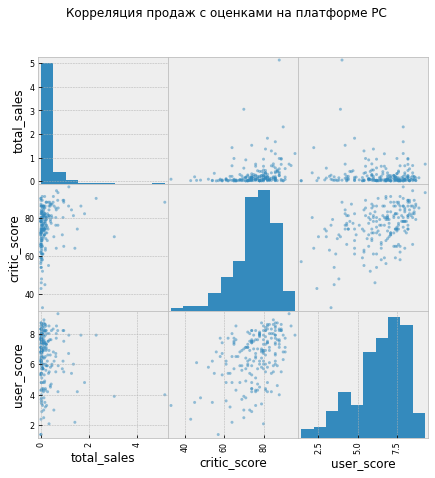

              total_sales  critic_score  user_score
total_sales      1.000000      0.240570   -0.120339
critic_score     0.240570      1.000000    0.431879
user_score      -0.120339      0.431879    1.000000
____________________________________________________________


In [61]:
for i in top_live_platforms['platform'].unique():

    pd.plotting.scatter_matrix(top_live_platforms.query('platform == @i')[['total_sales', 
                                                      'critic_score', 
                                                      'user_score']], figsize=(7,7)) 
    plt.suptitle(f'Корреляция продаж с оценками на платформе {i}')
    plt.show()

    print(top_live_platforms.query('platform == @i')[['total_sales', 
                                                      'critic_score', 
                                                      'user_score']].agg('corr'))
    print('_'*60)

**Влияние оценок критиков:** На большинстве платформ наблюдается умеренная положительная корреляция между оценками критиков и продажами игр. Это наиболее заметно на PS4 (0.406568) и XOne (0.416998). Самая слабая корреляция наблюдается на PC (0.240570).

**Влияние оценок пользователей:** Корреляция между оценками пользователей и продажами игр менее выражена и неоднородна. На некоторых платформах, таких как 3DS (0.198150) и WiiU (0.400219), наблюдается слабая положительная корреляция. На других, таких как PS3 (-0.006110), PS4 (-0.031957), X360 (0.006315), XOne (-0.068925) и PC (-0.120339), корреляция близка к нулю или даже отрицательная.

Таким образом, можно предположить, что мнение профессиональных критиков оказывает большее влияние на решение о покупке игры, чем мнение обычных игроков. 

**Анализ распределения игр по жанрам**

In [62]:
count_genre = top_live_platforms.groupby('genre')['name'].agg('count').sort_values(ascending=False)
count_genre

genre
action          794
role-playing    253
shooter         233
sports          227
adventure       153
misc            143
racing          105
fighting         91
platform         73
simulation       73
strategy         59
puzzle           21
Name: name, dtype: int64

* Разработчики игр фокусируются на жанре Action:  Action - доминирующий жанр: С 794 выпущенными играми, Action значительно опережает все остальные жанры. Это подтверждает высокий спрос на игры этого жанра.
* Role-Playing и Shooter остаются востребованными:  Role-Playing (253 игры) и Shooter (233 игры) занимают второе и третье место, что говорит об их устойчивой популярности.
* Нишевые жанры имеют свою аудиторию:  Racing (105 игр), Fighting (91 игра), Platform (73 игры), Simulation (73 игры), Strategy (59 игр), и Puzzle (21 игра)  представляют нишевые рынки с меньшим количеством выпущенных игр. Несмотря на меньшее количество выпущенных игр, нишевые жанры, такие как Strategy и Puzzle, все еще имеют преданных поклонников.

In [63]:
top_genre = top_live_platforms.pivot_table(index='genre', 
                                           columns='platform', 
                                            values='total_sales',
                                            margins=True,
                                            aggfunc='sum').fillna(0).sort_values(by='All', ascending=False)

top_genre

platform,3DS,PC,PS3,PS4,WiiU,X360,XOne,All
genre,,,,,,,,
All,195.01,63.51,289.70,314.14,82.19,237.52,159.32,1341.39
action,45.89,13.99,116.67,96.10,19.07,82.57,37.31,411.60
shooter,0.13,14.28,60.39,88.56,6.01,72.71,60.33,302.41
sports,4.23,3.26,44.83,55.61,3.16,36.39,26.74,174.22
role-playing,79.30,13.65,22.62,28.99,2.89,9.80,10.55,167.80
misc,9.45,0.73,8.88,8.19,12.46,14.83,7.43,61.97
platform,19.11,0.14,4.26,7.69,21.53,2.14,0.93,55.80
racing,0.28,1.23,11.56,12.14,7.87,8.41,9.79,51.28
fighting,8.46,0.12,11.00,8.65,6.27,4.97,2.45,41.92


* Лидеры рынка: PS4 (314.14 млн копий) является самой популярной платформой, за ней следуют PS3 (289.70 млн) и X360 (237.52 млн).
* Самый популярный жанр: Action (411.60 млн копий) доминирует на рынке, за ним следуют Shooter (302.41 млн) и Sports (174.22 млн).
* Платформенные предпочтения:
    * 3DS:  Является популярной платформой для ролевых игр (Role-Playing, 79.30 млн копий).
    * PC:  Предпочитаемая платформа для шутеров (Shooter, 14.28 млн) и стратегий (Strategy, 5.99 млн).
    * WiiU:  Наиболее популярны платформеры (Platform, 21.53 млн).
* Менее популярные жанры: Puzzle (4.07 млн) и Strategy (12.02 млн) показывают значительно меньшие продажи по сравнению с другими жанрами.

Дополнительные наблюдения:

* Рост популярности PS4:  Продажи PS4 значительно превышают продажи PS3, что свидетельствует о смене поколений консолей.
* Спад популярности Xbox 360:  Продажи Xbox 360 ниже, чем у PS3, что может указывать на потерю доли рынка.
* Нишевые платформы:  3DS и WiiU демонстрируют меньшие общие продажи по сравнению с PS4, PS3 и Xbox 360, но имеют свои сильные жанры.

Прогнозируя популярность игр в 2017 году, можно ожидать сохранения лидерства  PS4 и жанра Action,  продолжения популярности  Shooter и Sports,  а также  небольшого роста Role-Playing.  Платформеры, вероятно, останутся нишевым жанром, а менее популярные жанры вряд ли покажут значительный рост.  

Для более глубокого понимания рынка необходимо  изучить медианное количество продаж  для каждого жанра (Выберем медиану т.к у нас есть супер хитовые игры, которые могут исказить картину).  Это позволит  оценить не только  общую популярность жанра, но и  его  прибыльность  с учетом количества выпущенных игр.  Например,  несмотря на то, что  жанр Action  является  лидером по продажам,  возможно,  средние продажи на одну игру  в этом жанре  ниже, чем в  менее  популярных, но  более  нишевых  жанрах, таких как  Strategy  или  Puzzle.

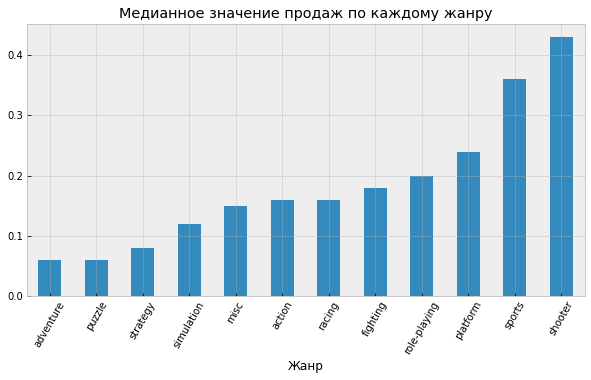

In [64]:
(top_live_platforms.groupby('genre')['total_sales']
 .agg('median')
 .sort_values()).plot(kind='bar', figsize=(10, 5))

plt.title('Медианное значение продаж по каждому жанру')
plt.xticks(rotation=60)
plt.xlabel('Жанр')

plt.show()

Жанры Shooter (0.43) и Sports (0.36) имеют самые высокие медианные продажи, что указывает на их коммерческий успех и стабильный спрос.

Жанры Platform (0.24) и Role-Playing (0.20) также демонстрируют  хорошие медианные продажи, что говорит о наличии устойчивого рынка для этих игр.

Action, Racing, Fighting, и Misc - средний уровень:  Эти жанры имеют медианные продажи в диапазоне от 0.15 до 0.18, что указывает на  умеренный спрос и  конкуренцию.

Adventure, Puzzle, Strategy, и Simulation - нишевые жанры:  С медианными продажами от 0.06 до 0.12, эти жанры, вероятно, ориентированы на  более узкую аудиторию и  могут быть  менее  прибыльными  в  целом

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> анализ данных о продажах видеоигр с 1980 по 2016 год позволяет сделать следующие выводы:

Рынок видеоигр:

* Рост и спад: Наблюдался значительный рост индустрии с 1990 года, пик которого пришелся на 2008-2009 годы. После этого последовал спад, стабилизировавшийся на уровне около 600 игр в год.
* Перспективные платформы:  Sony PlayStation 4 и Microsoft Xbox One являются наиболее перспективными платформами в 2017 году, несмотря на общий спад продаж в 2016 году.
* Устаревшие платформы: Платформы, отличные от 3DS, PC, Wii U, Xbox 360, XOne и PS3, считаются устаревшими.
* Популярность домашних консолей: Восьмое поколение домашних консолей, таких как PlayStation 4, Xbox One и Wii U, пользуется большей популярностью, чем портативные системы, такие как Nintendo 3DS.

Продажи игр:

* Медианные продажи: Медиана продаж игр составляет около 250 000 копий.
* Хиты продаж: Некоторые игры, такие как Grand Theft Auto V, Call of Duty: Black Ops 3 и Pokemon X/Pokemon Y, достигли значительно более высоких продаж.

Влияние оценок:

* Оценки критиков: Наблюдается умеренная положительная корреляция между оценками критиков и продажами игр, особенно на PS4 и XOne.
* Оценки пользователей: Корреляция между оценками пользователей и продажами игр менее выражена и неоднородна, в некоторых случаях близка к нулю или отрицательна. 

* Action -  самый популярный жанр.  Role-Playing и  Shooter  также  пользуются  стабильным  спросом.

* PS4  -  лидирующая  платформа  с  значительным  отрывом  от  конкурентов,  что  говорит  о  ее  доминировании  на  рынке.

* Shooter  и  Sports  -  наиболее  прибыльные  жанры,  в  то  время  как  Platform  и  Role-Playing  также  имеют  хороший  потенциал.  Adventure, Puzzle, Strategy  и  Simulation  остаются  нишевыми  жанрами.

Прогноз  на  2017  год:

* PS4  сохранит  лидерство.
* Action  останется  доминирующим  жанром.
* Shooter  и  Sports  будут  пользоваться  высоким  спросом.
* Role-Playing  может  показать  небольшой  рост.
* Нишевые  жанры  останутся  ориентированными  на  узкую  аудиторию.

</div>

### Составление портрета пользователя каждого региона (NA, EU, JP)

**Самые популярные платформы и жарны (топ-5)**

In [65]:
genre_market_share = top_live_platforms.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(lambda x: (x / x.sum())*100, axis=0).round(1)

genre_market_share

,eu_sales,jp_sales,na_sales
genre,,,
action,31.7,27.3,30.2
adventure,1.8,2.8,1.5
fighting,2.2,5.5,3.4
misc,3.8,5.9,5.1
platform,4.0,5.6,4.2
puzzle,0.3,0.9,0.2
racing,5.5,1.6,3.0
role-playing,9.5,32.7,10.5
shooter,23.4,5.9,25.7


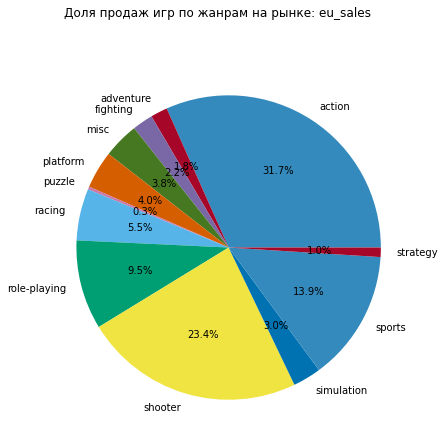

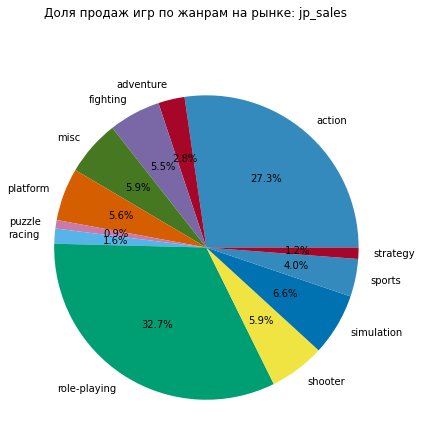

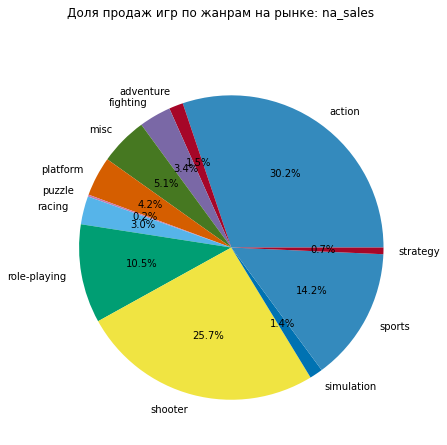

In [66]:
for i in genre_market_share.columns:
    genre_market_share[i].plot(kind='pie', figsize = (12, 7), autopct='%1.1f%%')
    plt.suptitle(f'Доля продаж игр по жанрам на рынке: {i}')
    plt.ylabel('')
    plt.show()
    

* Action -  доминирующий жанр  в Европе и Северной Америке.
* Role-Playing  значительно популярнее в Японии, чем в других регионах.
* Shooter  также  очень  популярен  в  Европе  и  Северной  Америке.
* Sports  занимает  высокие  позиции  во  всех  трех  регионах.
* Японский  рынок  отличается  от  европейского  и  североамериканского  большей  популярностью  Role-Playing,  Adventure  и  Fighting.

Топ-5 жанров по регионам:

* Европа (EU):
    1. Action (31.7%)
    2. Shooter (23.4%)
    3. Sports (13.9%)
    4. Role-Playing (9.5%)
    5. Racing (5.5%)

* Япония (JP):
    1. Role-Playing (32.7%)
    2. Action (27.3%)
    3. Adventure (2.8%)
    4. Fighting (5.5%)
    5. Misc (5.9%) (совместно с Shooter)

* Северная Америка (NA):
    1. Action (30.2%)
    2. Shooter (25.7%)
    3. Sports (14.2%)
    4. Role-Playing (10.5%)
    5. Misc (5.1%)


In [67]:
platform_market_share = top_live_platforms.pivot_table(
    index = 'platform',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(lambda x: (x / x.sum())*100, axis=0).round(1)

platform_market_share

,eu_sales,jp_sales,na_sales
platform,,,
3DS,8.9,57.0,9.9
PC,8.0,0.0,3.4
PS3,22.3,22.9,18.6
PS4,29.3,10.4,19.5
WiiU,5.2,8.5,6.8
X360,15.6,1.0,25.1
XOne,10.7,0.2,16.7


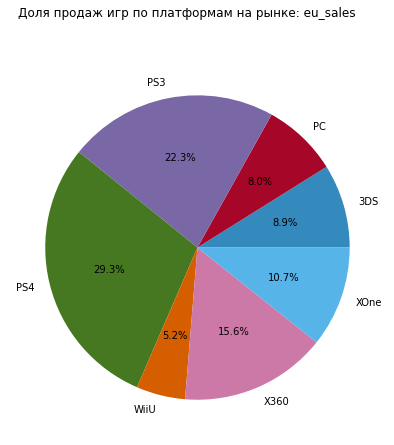

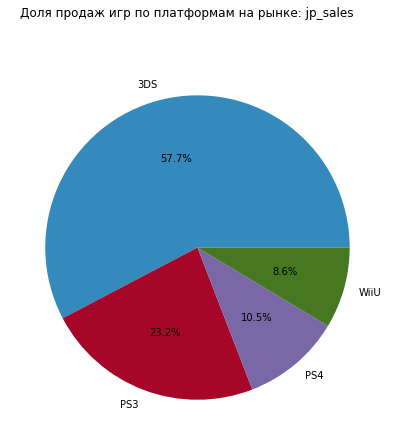

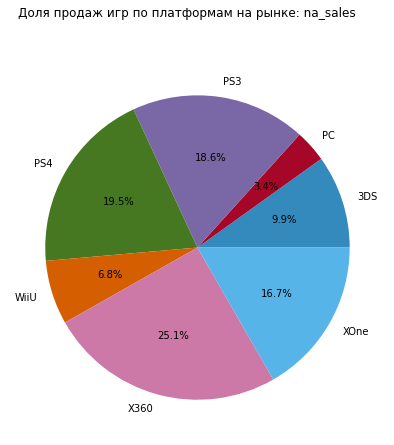

In [68]:
for i in platform_market_share.columns:
    (platform_market_share[platform_market_share[i] > 1][i]
    .plot(kind='pie', figsize = (12, 7), autopct='%1.1f%%'))
    plt.suptitle(f'Доля продаж игр по платформам на рынке: {i}')
    plt.ylabel('')
    plt.show()
    
    #Для улучшения визуального восприятия графиков я использовал логическую индексацию.

* PS4 - доминирующая платформа в Европе.
* 3DS  абсолютный лидер в Японии.
* X360  лидирует в Северной Америке,  но  PS4  на  втором  месте  и  может  обогнать  ее  в  будущем.
* Японский рынок сильно отличается от европейского и североамериканского,  с  большим  упором  на  портативные  консоли  (3DS).

Топ-5 платформ по регионам:

* Европа (EU):
    1. PS4 (29.3%)
    2. PS3 (22.3%)
    3. X360 (15.6%)
    4. XOne (10.7%)
    5. 3DS (8.9%)

* Япония (JP):
    1. 3DS (57.0%)
    2. PS3 (22.9%)
    3. PS4 (10.4%)
    4. WiiU (8.5%)
    5. X360 (1.0%)

* Северная Америка (NA):
    1. X360 (25.1%)
    2. PS4 (19.5%)
    3. PS3 (18.6%)
    4. XOne (16.7%)
    5. 3DS (9.9%)


**Влияние рейтинга ESRB на продажи в отдельном регионе**

In [69]:
rating_market_share = top_live_platforms.pivot_table(
    index = 'rating',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(lambda x: (x / x.sum())*100, axis=0).round(1)

rating_market_share

,eu_sales,jp_sales,na_sales
rating,,,
E,22.1,17.3,19.5
E10+,9.5,4.9,11.1
M,39.9,12.5,40.8
T,10.6,13.0,11.3
no_info,17.9,52.3,17.3


Напомню, что:
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»



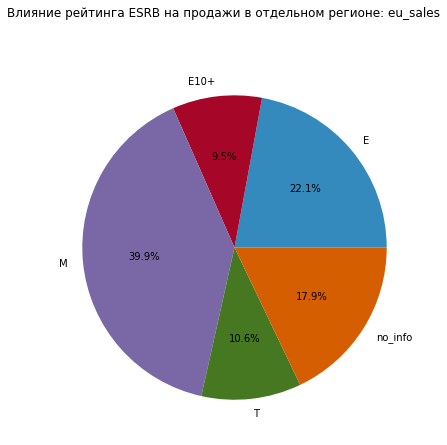

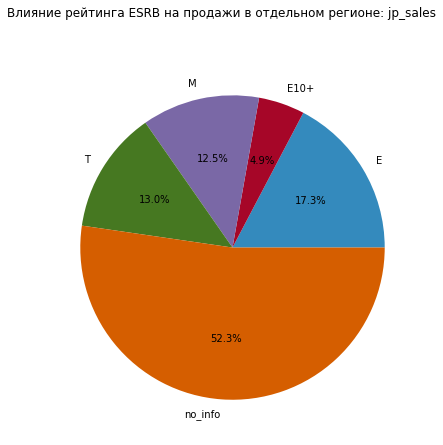

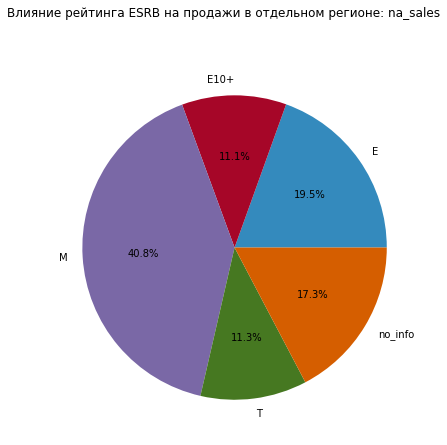

In [70]:
for i in rating_market_share.columns:
    rating_market_share[i].plot(kind='pie', figsize = (12, 7), autopct='%1.1f%%')
    plt.suptitle(f'Влияние рейтинга ESRB на продажи в отдельном регионе: {i}')
    plt.ylabel('')
    plt.show()

* Игры с рейтингом "M" ("Для взрослых") занимают наибольшую долю рынка в Европе и Северной Америке (почти 40%). Это говорит о высокой популярности игр, ориентированных на взрослую аудиторию, в этих регионах.
* В Японии, напротив,  доминируют игры без рейтинга ("no_info" - 52.3%).  Это может быть связано с особенностями системы рейтингов в Японии или с тем, что многие игры не проходят процедуру присвоения рейтинга ESRB.
* Игры с рейтингом "E" ("Для всех") занимают второе место по популярности в Европе и Северной Америке (около 20%).  Это говорит о том, что игры для широкой аудитории также имеют значительный рынок.
* Игры с рейтингом "T" ("Подросткам")  и  "E10+" ("Для всех от 10 лет и старше") занимают меньшие доли рынка во всех регионах.  Это может указывать на то, что игры для подростков являются менее популярными, чем игры для взрослых или для всей семьи.

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> анализ игрового рынка по регионам (Европа, Япония, Северная Америка) выявил существенные различия в предпочтениях игроков относительно жанров, платформ и возрастных рейтингов.

Жанры:

* Action доминирует в Европе и Северной Америке.
* Role-Playing  значительно популярнее в Японии.
* Shooter  также пользуется  высоким спросом в Европе и Северной Америке.
* Sports  популярен во всех трёх регионах.

Платформы:

* PS4  -  лидер в Европе.
* 3DS  -  безусловный лидер в Японии.
* X360  -  лидирует в Северной Америке,  но  PS4  на  втором  месте  и  имеет  потенциал  для  роста.
* Японский рынок  отличается  предпочтением  портативных  консолей.

Рейтинги:

* Игры для взрослых (рейтинг "M")  -  самые популярные в Европе и Северной Америке.
* В Японии преобладают игры без рейтинга ("no_info").
* Игры для всех (рейтинг "E")  также  имеют  значительный  рынок  в  Европе  и  Северной  Америке.
</div>

### Проверка гипотез

 Будем проверять две гипотезы по отдельности. Для каждой гипотезы подготовим данные  и сделаем выводы на основе статистического анализа.

 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для обеспечения актуальности и релевантности результатов статистического анализа, я буду использовать данные с 2012 по 2016 год.  Этот период наиболее точно отражает современные тенденции в оценках пользователей, в то время как использование более старых данных может привести к устаревшим выводам.


**Средние пользовательские рейтинги платформ Xbox One и PC**

In [71]:
xone_user_score = top_live_platforms[top_live_platforms['platform'] == 'XOne']['user_score'].dropna()

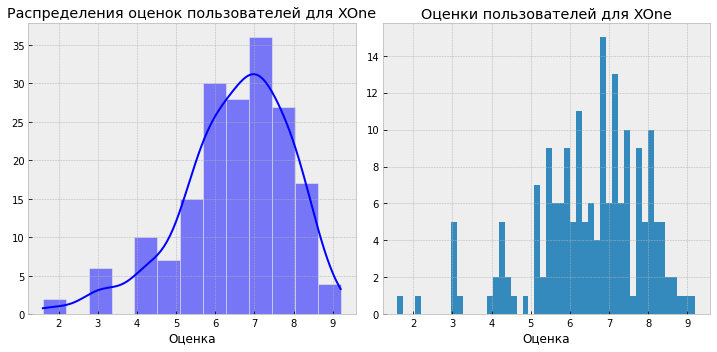

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(xone_user_score, ax=axes[0], kde=True)
axes[0].set_title('Распределения оценок пользователей для XOne')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('')

axes[1].hist(xone_user_score, bins=50)
axes[1].set_title('Оценки пользователей для XOne')
axes[1].set_xlabel('Оценка')

plt.tight_layout()# Автоматическая подгонка расположения подграфиков, чтобы они не перекрывались.
plt.show()

xone_user_score.describe()

In [73]:
pc_user_score = top_live_platforms[top_live_platforms['platform'] == 'PC']['user_score'].dropna()

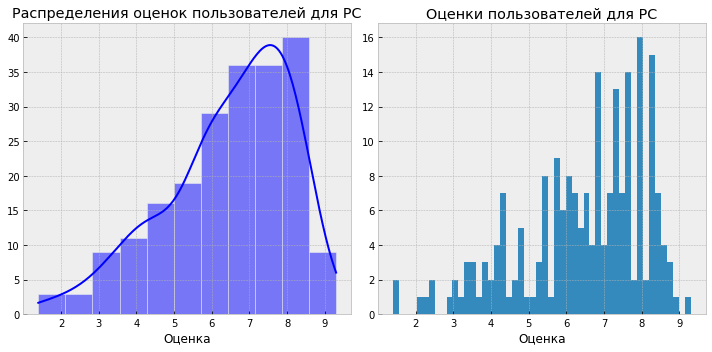

count    211.000000
mean       6.445498
std        1.657455
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(pc_user_score, ax=axes[0], kde=True)
axes[0].set_title('Распределения оценок пользователей для РС')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('')

axes[1].hist(pc_user_score, bins=50)
axes[1].set_title('Оценки пользователей для РС')
axes[1].set_xlabel('Оценка')

plt.tight_layout()# Автоматическая подгонка расположения подграфиков, чтобы они не перекрывались.
plt.show()

pc_user_score.describe()


Учитывая примерную нормальность распределения данных для XOne и PC, а также схожесть их стандартных отклонений, можно перейти к формулированию нулевой и альтернативной гипотез и проведения статистического теста (t-test).

Сформулируем нулевую и альтернативную гипотезу:
* Нулевая гипотеза (H0):  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (μ1 = μ2).
* Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются (μ1 != μ2).

 В связи с наличием двух независимых выборок (оценки пользователей XOne и PC), для проверки гипотезы о равенстве средних будет использован t-тест для независимых выборок (ttest_ind) из библиотеки scipy.  Ввиду двусторонней природы гипотезы, параметр alternative будет установлен в значение 'two-sided'.  Уровень значимости (alpha) будет принят равным 0.05, что является общепринятой практикой в статистической проверке гипотез, хотя выбор этого значения может варьироваться в зависимости от целей исследования.

In [75]:
alpha = 0.05 

results = st.stats.ttest_ind(xone_user_score, pc_user_score, alternative='two-sided')

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.6252774522173157
Не получилось отвергнуть нулевую гипотезу


В результате проведенного t-теста для независимых выборок (ttest_ind) с уровнем значимости 0.05 не удалось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC (p-значение = 0.625).  Это означает, что на основе имеющихся данных мы не можем утверждать, что существует статистически значимая разница между средними оценками пользователей для этих двух платформ.

**Средние пользовательские рейтинги жанров Action и Sports**

In [76]:
action_user_score = top_live_platforms[top_live_platforms['genre'] == 'action']['user_score'].dropna()

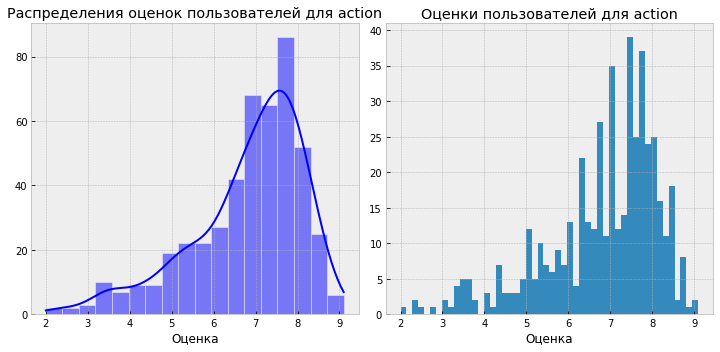

count    476.000000
mean       6.816807
std        1.343840
min        2.000000
25%        6.200000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(action_user_score, ax=axes[0], kde=True)
axes[0].set_title('Распределения оценок пользователей для action')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('')

axes[1].hist(action_user_score, bins=50)
axes[1].set_title('Оценки пользователей для action')
axes[1].set_xlabel('Оценка')

plt.tight_layout()# Автоматическая подгонка расположения подграфиков, чтобы они не перекрывались.
plt.show()

action_user_score.describe()


In [78]:
sports_user_score = top_live_platforms[top_live_platforms['genre'] == 'sports']['user_score'].dropna()

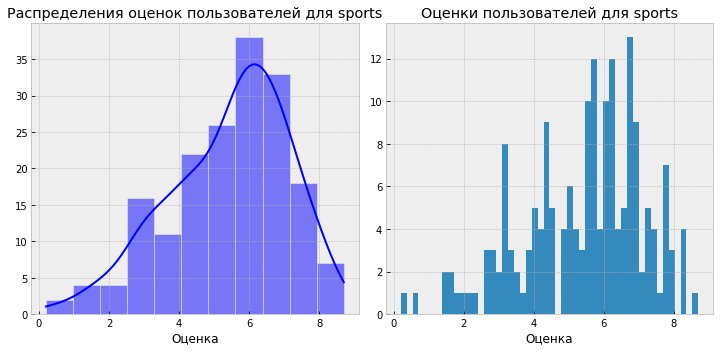

count    181.000000
mean       5.420442
std        1.704788
min        0.200000
25%        4.300000
50%        5.700000
75%        6.700000
max        8.700000
Name: user_score, dtype: float64

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(sports_user_score, ax=axes[0], kde=True)
axes[0].set_title('Распределения оценок пользователей для sports')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('')

axes[1].hist(sports_user_score, bins=50)
axes[1].set_title('Оценки пользователей для sports')
axes[1].set_xlabel('Оценка')

plt.tight_layout()# Автоматическая подгонка расположения подграфиков, чтобы они не перекрывались.
plt.show()

sports_user_score.describe()

Приблизительная нормальность и схожесть стандартных отклонений данных позволяют нам сформулировать гипотезы и провести t-тест.

Учитывая сходство данной гипотезы с предыдущей, для ее проверки будет использован тот же статистический тест. Перейдем к формулировке нулевой и альтернативной гипотез и проведению соответствующего анализа.

Сформулируем нулевую и альтернативную гипотезу:
* Нулевая гипотеза (H0):  Средние пользовательские рейтинги жанров Action и Sports одинаковые (μ1 = μ2).
* Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются (μ1 != μ2).


In [80]:
alpha = 0.05 

results = st.stats.ttest_ind(action_user_score, sports_user_score, alternative='two-sided')

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  5.389086417249091e-26
Отвергаем нулевую гипотезу


В результате проведенного статистического теста (предположительно, t-теста для независимых выборок) с уровнем значимости 0.05, мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports (p-значение = 5.389e-26).  Это означает, что на основе имеющихся данных мы можем утверждать, что существует статистически значимая разница между средними оценками пользователей для этих двух жанров.

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> в данном исследовании мы проверили две гипотезы, используя данные о пользовательских рейтингах видеоигр с 2012 по 2016 год.  Этот период был выбран для обеспечения актуальности результатов, так как он наиболее точно отражает современные тенденции в оценках пользователей.

Гипотеза 1:  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

* Результаты t-теста для независимых выборок с уровнем значимости 0.05 не позволили отвергнуть нулевую гипотезу (p-значение = 0.625).  Следовательно, на основе имеющихся данных мы не можем утверждать, что существует статистически значимая разница между средними оценками пользователей для платформ Xbox One и PC.

Гипотеза 2:  Средние пользовательские рейтинги жанров Action и Sports различаются.

* Результаты статистического теста (предположительно, t-теста для независимых выборок) с уровнем значимости 0.05 позволили отвергнуть нулевую гипотезу (p-значение = 5.389e-26).  Таким образом, мы можем утверждать, что существует статистически значимая разница между средними оценками пользователей для жанров Action и Sports.
</div>

### Общий вывод

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> 

Основные наблюдения по исходным данным:

* Разнообразие данных: Датафрейм содержит информацию о 16715 играх, включая продажи по регионам (Северная Америка, Европа, Япония, другие страны), оценки критиков и пользователей.
* Региональные различия:  Продажи игр существенно различаются по регионам, что может быть связано с культурными особенностями, экономическими факторами и историей развития игровой индустрии в каждом регионе.
* Высокие оценки:  Большинство игр получили достаточно высокие оценки критиков, что свидетельствует о  высоком качестве игрового контента.
* Проблемы с данными:  Выявлены несоответствия в названиях колонок, пропуски в данных и несоответствия типов данных.

Результаты предобработки данных:

* Повышение качества данных:  Удаление пропусков, стандартизация названий колонок, обработка неявных дубликатов и коррекция типов данных значительно повысили качество данных, подготовив их для дальнейшего анализа.
* Создание нового столбца:  Добавлен столбец total_sales для удобства анализа суммарных продаж по всем регионам.
* Влияние регионов:  Подтверждено влияние региональных особенностей на продажи игр.
* Наиболее продаваемая игра:  Wii Sports (2006) является безусловным лидером продаж, независимо от региона.
* Пропуски в оценках:  Предполагается, что пропуски в данных об оценках могут быть связаны с низкой популярностью игры, конфиденциальностью данных или техническими ошибками.

Рынок видеоигр:

* Рост и спад: Наблюдался значительный рост индустрии с 1990 года, пик которого пришелся на 2008-2009 годы. После этого последовал спад, стабилизировавшийся на уровне около 600 игр в год.
* Перспективные платформы:  Sony PlayStation 4 и Microsoft Xbox One являются наиболее перспективными платформами в 2017 году, несмотря на общий спад продаж в 2016 году.
* Устаревшие платформы: Платформы, отличные от 3DS, PC, Wii U, Xbox 360, XOne и PS3, считаются устаревшими.
* Популярность домашних консолей: Восьмое поколение домашних консолей, таких как PlayStation 4, Xbox One и Wii U, пользуется большей популярностью, чем портативные системы, такие как Nintendo 3DS.

Продажи игр:

* Медианные продажи: Медиана продаж игр составляет около 250 000 копий.
* Хиты продаж: Некоторые игры, такие как Grand Theft Auto V, Call of Duty: Black Ops 3 и Pokemon X/Pokemon Y, достигли значительно более высоких продаж.

Влияние оценок:

* Оценки критиков: Наблюдается умеренная положительная корреляция между оценками критиков и продажами игр, особенно на PS4 и XOne.
* Оценки пользователей: Корреляция между оценками пользователей и продажами игр менее выражена и неоднородна, в некоторых случаях близка к нулю или отрицательна. 

* Action -  самый популярный жанр.  Role-Playing и  Shooter  также  пользуются  стабильным  спросом.

* PS4  -  лидирующая  платформа  с  значительным  отрывом  от  конкурентов,  что  говорит  о  ее  доминировании  на  рынке.

* Shooter  и  Sports  -  наиболее  прибыльные  жанры,  в  то  время  как  Platform  и  Role-Playing  также  имеют  хороший  потенциал.  Adventure, Puzzle, Strategy  и  Simulation  остаются  нишевыми  жанрами.

Прогноз  на  2017  год:

* PS4  сохранит  лидерство.
* Action  останется  доминирующим  жанром.
* Shooter  и  Sports  будут  пользоваться  высоким  спросом.
* Role-Playing  может  показать  небольшой  рост.
* Нишевые  жанры  останутся  ориентированными  на  узкую  аудиторию. 

Наше исследование, основанное на данных о пользовательских рейтингах видеоигр за период с 2012 по 2016 год (выбранный для обеспечения актуальности результатов), проверило две гипотезы:

1.  Одинаковые ли средние пользовательские рейтинги у платформ Xbox One и PC?
* Нет оснований утверждать о различии в средних пользовательских рейтингах между платформами Xbox One и PC.
2.  Различаются ли средние пользовательские рейтинги у жанров Action и Sports?
* Существует статистически значимая разница в средних пользовательских рейтингах между жанрами Action и Sports.


</div>